In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv")

In [4]:
df.sample(10)

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
7834,SE,576.0,7,7.0,5.0,8.0,8.0,6.0,6.0,1.0,1.0,71.0,1.0
5538,NO,11130.0,6,2.0,3.0,3.0,2.0,9.0,6.0,4.0,1.0,54.0,1.0
2218,CZ,1015.0,7,2.0,8.0,4.0,3.0,5.0,3.0,2.0,2.0,40.0,2.0
6812,SE,225.0,6,6.0,10.0,8.0,10.0,10.0,6.0,1.0,1.0,80.0,2.0
3198,ES,818.0,6,3.0,8.0,7.0,8.0,8.0,6.0,4.0,2.0,22.0,2.0
1958,CZ,1418.0,6,7.0,0.0,2.0,2.0,8.0,6.0,4.0,1.0,46.0,1.0
4532,ES,1062.0,7,1.0,5.0,7.0,3.0,9.0,6.0,3.0,2.0,21.0,2.0
3693,ES,1954.0,6,3.0,5.0,8.0,7.0,9.0,3.0,3.0,2.0,57.0,1.0
5492,NO,10206.0,6,4.0,8.0,9.0,8.0,9.0,6.0,2.0,1.0,86.0,1.0
6787,SE,105.0,6,3.0,0.0,NaN,0.0,4.0,2.0,NaN,2.0,86.0,2.0


In [12]:
df.describe()

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
count,8.594000e+03,8594.000000,8586.000000,8580.000000,8555.000000,8569.000000,8563.000000,8579.000000,8500.000000,8584.000000,8355.000000,8577.000000
mean,3.954938e+04,6.500000,3.861985,5.559907,6.005143,5.319874,7.694616,5.192563,2.748941,1.497204,47.470736,1.384867
std,6.267259e+05,0.500029,2.019689,2.233700,2.129866,2.173449,1.735904,1.457643,0.905477,0.500021,18.397369,0.486592
min,1.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,1.000000
25%,1.052000e+03,6.000000,2.000000,4.000000,5.000000,4.000000,7.000000,4.000000,2.000000,1.000000,33.000000,1.000000
50%,1.714000e+03,6.500000,4.000000,6.000000,6.000000,5.000000,8.000000,6.000000,3.000000,1.000000,47.000000,1.000000
75%,2.745000e+03,7.000000,5.000000,7.000000,8.000000,7.000000,9.000000,6.000000,3.000000,2.000000,62.000000,2.000000
max,1.100143e+07,7.000000,7.000000,10.000000,10.000000,10.000000,10.000000,7.000000,5.000000,2.000000,114.000000,2.000000


In [21]:
df.isnull().sum()

cntry        0
idno         0
year         0
tvtot        8
ppltrst     14
pplfair     39
pplhlp      25
happy       31
sclmeet     15
sclact      94
gndr        10
agea       239
partner     17
dtype: int64

In [36]:
df.groupby(df['cntry'])['idno'].count()

cntry
CH    1546
CZ    1316
DE      28
ES    2426
NO    1462
SE    1816
Name: idno, dtype: int64

In [31]:
countries = df.cntry.unique().tolist()
countries

['CH', 'CZ', 'DE', 'ES', 'NO', 'SE']

### Were people more trusting in 2012, or 2014?

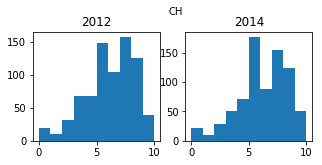

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


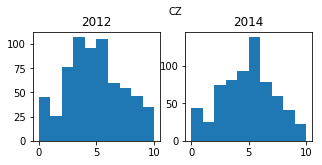

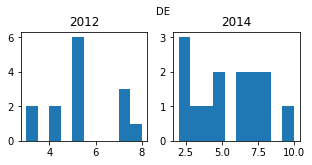

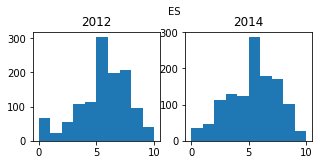

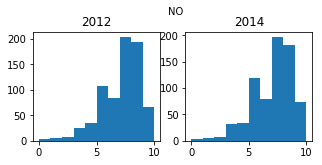

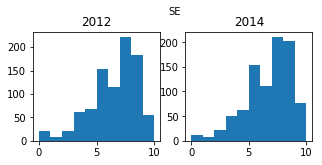

In [26]:
for country in countries:
    
    fig, ax1 = plt.subplots(1, 2, figsize=(5, 2))

    ax1[0].hist(df['ppltrst'][(df['cntry'] == country) & (df['year']==6)])
    ax1[1].hist(df['ppltrst'][(df['cntry'] == country) & (df['year']==7)])

    fig.text(0.5, 1, country)
    ax1[0].set_title('2012')
    ax1[1].set_title('2014')
    
    plt.show()

In [40]:
for country in countries:
    print(country)
    print('2012 mean: ' + str(df['ppltrst'][(df['cntry'] == country) & (df['year']==6)].mean()))
    print('2014 mean: ' + str(df['ppltrst'][(df['cntry'] == country) & (df['year']==7)].mean()))  
    print(stats.ttest_rel(df['ppltrst'][(df['cntry'] == country) & (df['year']==6)], 
                          df['ppltrst'][(df['cntry'] == country) & (df['year']==7)],
                          nan_policy='omit'
                         ))

CH
2012 mean: 5.677878395860285
2014 mean: 5.751617076326003
Ttest_relResult(statistic=-0.6586851756725737, pvalue=0.5102943511301135)
CZ
2012 mean: 4.362519201228879
2014 mean: 4.424657534246576
Ttest_relResult(statistic=-0.5001638336887216, pvalue=0.617129268240474)
DE
2012 mean: 5.214285714285714
2014 mean: 5.357142857142857
Ttest_relResult(statistic=-0.18399501804849683, pvalue=0.8568563797095805)
ES
2012 mean: 5.114591920857379
2014 mean: 4.895127993393889
Ttest_relResult(statistic=2.4561906976601646, pvalue=0.014181580725320284)
NO
2012 mean: 6.64931506849315
2014 mean: 6.598630136986301
Ttest_relResult(statistic=0.5073077081124404, pvalue=0.61209257015177)
SE
2012 mean: 6.058498896247241
2014 mean: 6.257709251101321
Ttest_relResult(statistic=-2.0671082026033982, pvalue=0.03900781670958545)


It seems that only Norway and Spain decreased in trust. However, Norway's decrease was slight. It does seem that Norway had a much smaller sample here, so the mean would be more sensitive that Spain's, and may have not experienced such a large decrease at all.

### Were people happier in 2012, or, 2014?

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


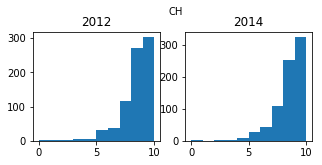

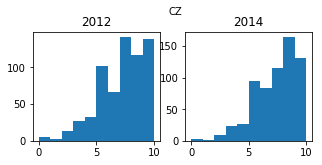

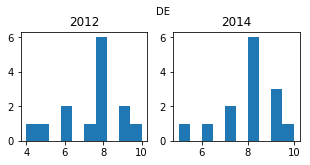

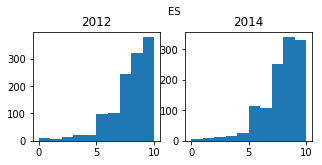

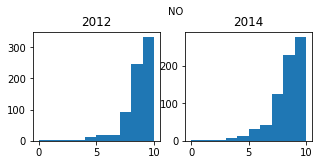

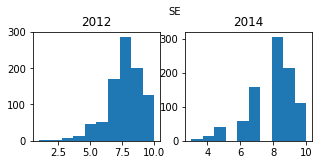

In [28]:
for country in countries:
    
    fig, ax1 = plt.subplots(1, 2, figsize=(5, 2))

    ax1[0].hist(df['happy'][(df['cntry'] == country) & (df['year']==6)])
    ax1[1].hist(df['happy'][(df['cntry'] == country) & (df['year']==7)])

    fig.text(0.5, 1, country)
    ax1[0].set_title('2012')
    ax1[1].set_title('2014')
    
    plt.show()

In [38]:
for country in countries:
    print(country)
    print('2012 mean: ' + str(df['happy'][(df['cntry'] == country) & (df['year']==6)].mean()))
    print('2014 mean: ' + str(df['happy'][(df['cntry'] == country) & (df['year']==7)].mean()))  
    print(stats.ttest_rel(df['happy'][(df['cntry'] == country) & (df['year']==6)], 
                          df['happy'][(df['cntry'] == country) & (df['year']==7)],
                          nan_policy='omit'
                         ))

CH
2012 mean: 8.088311688311688
2014 mean: 8.116429495472186
Ttest_relResult(statistic=-0.319412957862232, pvalue=0.7495001355429063)
CZ
2012 mean: 6.7708978328173375
2014 mean: 6.914110429447852
Ttest_relResult(statistic=-1.4561384833039597, pvalue=0.1458454843389451)
DE
2012 mean: 7.428571428571429
2014 mean: 7.857142857142857
Ttest_relResult(statistic=-0.8062257748298549, pvalue=0.4346138707734991)
ES
2012 mean: 7.548679867986799
2014 mean: 7.41996699669967
Ttest_relResult(statistic=1.613832417735418, pvalue=0.10682451556479494)
NO
2012 mean: 8.25171939477304
2014 mean: 7.9151846785225715
Ttest_relResult(statistic=4.2856826576235925, pvalue=2.067453013405473e-05)
SE
2012 mean: 7.907386990077177
2014 mean: 7.946961325966851
Ttest_relResult(statistic=-0.5581637086030012, pvalue=0.5768709591233714)


It seems that all countries, other than Spain and Norway again decreased in their mean here. other than that, all countries appeared happier. I used the Wilcoxn ranked test, since all histograms were non-normal.

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


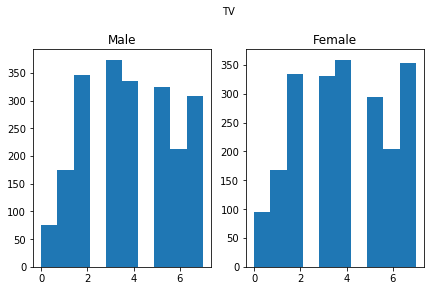

In [51]:
male = df['tvtot'][(df['gndr'] == 1.0) & (df['year']==6)]
female = df['tvtot'][(df['gndr'] == 2.0) & (df['year']==6)]

fig, ax1 = plt.subplots(1, 2, figsize=(7, 4))

ax1[0].hist(male)
ax1[1].hist(female)

fig.text(0.5, 1, 'TV')
ax1[0].set_title('Male')
ax1[1].set_title('Female')
    
plt.show()

In [68]:
print('Male mean: ' + str( male.mean()))
print('Male sample count:', male.count())
print('Male variance:', male.var())
print('Female variance:', female.var())
print('Female mean: ' + str(female.mean()))
print('female sample count:', female.count())
print(stats.ttest_ind(male, 
                    female,
                    nan_policy='omit'
                    ))

Male mean: 3.901906090190609
Male sample count: 2151
female sample count: 2140
Male variance: 3.9350242721070847
Female variance: 4.2002724218234535
Female mean: 3.944392523364486
Ttest_indResult(statistic=-0.6899928109209502, pvalue=0.49023604027095813)


There is not much of a difference in the means for these samples. I used the t-test measure, because the samples and variances were similar.

### Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


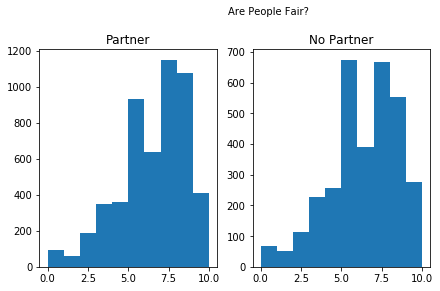

In [74]:
partner = df['pplfair'][(df['partner'] == 1.0)]
no_partner = df['pplfair'][(df['partner'] == 2.0)]

fig, ax1 = plt.subplots(1, 2, figsize=(7, 4))

ax1[0].hist(partner)
ax1[1].hist(no_partner)

fig.text(0.5, 1, 'Are People Fair?')
ax1[0].set_title('Partner')
ax1[1].set_title('No Partner')
    
plt.show()

In [75]:
print('Partner mean: ' + str(partner.mean()))
print('Partner sample count:', partner.count())
print('Partner variance:', partner.var())
print('Partner Standard Deviation:', partner.std())
print('No Partner variance:', no_partner.var())
print('No Partner mean: ' + str(no_partner.mean()))
print('No Partner sample count:', no_partner.count())
print('No Partner Standard Deviation', no_partner.std())
print(stats.ttest_ind(partner, 
                     no_partner,
                     nan_policy='omit'))

Partner mean: 6.063890473474045
Partner sample count: 5259
Partner variance: 4.451223431135867
Partner Standard Deviation: 2.1097922720343507
No Partner variance: 4.665807447987503
No Partner mean: 5.911280487804878
No Partner sample count: 3280
No Partner Standard Deviation 2.1600480198337033
Ttest_indResult(statistic=3.221397103615396, pvalue=0.001280455731833167)


After looking at this, it would be reasonable to say that the data supports that people with partners find others more fair. I used a t-test because the means looked relatively normal (a small negative skewness) and the standard deviations were almost the same.  So, it would be reasonable to conclude that with the partner mean more than two above the no partner mean, they are different. However, the sample sizes are a bit off. However, they are both over 3000. 

### Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

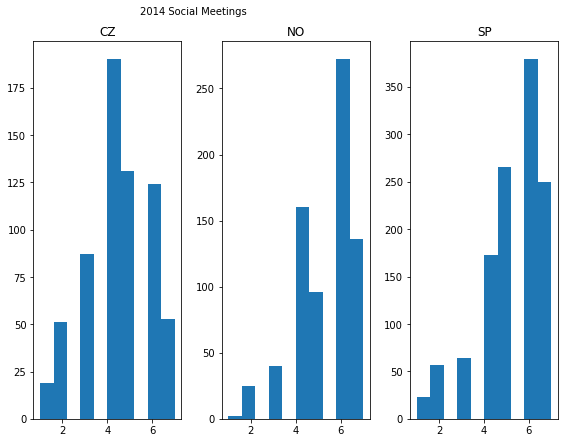

In [89]:
czech = df['sclmeet'][(df['cntry'] == 'CZ') & (df['year'] == 7)].dropna()
norway = df['sclmeet'][(df['cntry'] == 'NO') & (df['year'] == 7)].dropna()
spain = df['sclmeet'][(df['cntry'] == 'ES')& (df['year'] == 7)].dropna()


fig, axs = plt.subplots(1, 3, figsize=(8, 6))

axs[0].hist(czech)
axs[1].hist(norway)
axs[2].hist(spain)

fig.text(0.25, 1, '2014 Social Meetings')
axs[0].set_title('CZ')
axs[1].set_title('NO')
axs[2].set_title('SP')
    
plt.tight_layout()
plt.show()

In [90]:
F, p = stats.f_oneway(czech, norway, spain)

print('F score: ' + str(F))
print('P-value: ' + str(p))

F score: 81.74680103458824
P-value: 3.7301766062786706e-35


In [93]:
print('Czech Republic mean: ' + str(czech.mean()))
print('Czech Republic count: ' + str(czech.count()))
print('Norway mean: ' + str(norway.mean()))
print('Norway count: ' + str(norway.count()))
print('Spain mean: ' + str(spain.mean()))
print('Spain count: ' + str(spain.count()))

Czech Republic mean: 4.445801526717557
Czech Republic count: 655
Norway mean: 5.3023255813953485
Norway count: 731
Spain mean: 5.2601156069364166
Spain count: 1211


In [92]:
print('Norway and Czech Republic: ' + str(stats.ttest_ind(norway, czech)))
print('Spain and Norway: ' + str(stats.ttest_ind(spain, norway)))
print('Czech Republic and Spain: ' + str(stats.ttest_ind(czech, spain)))

Norway and Czech Republic: Ttest_indResult(statistic=11.269186128577815, pvalue=3.0334022155191707e-28)
Spain and Norway: Ttest_indResult(statistic=-0.632916395870007, pvalue=0.5268628350318294)
Czech Republic and Spain: Ttest_indResult(statistic=-11.400026538179093, pvalue=3.7676844407353374e-29)


The Czech Republic had a much lower mean, but also a much smaller sample. Which made the better comparison between Norway and Spain, which was closer to acheiving significance.

### Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

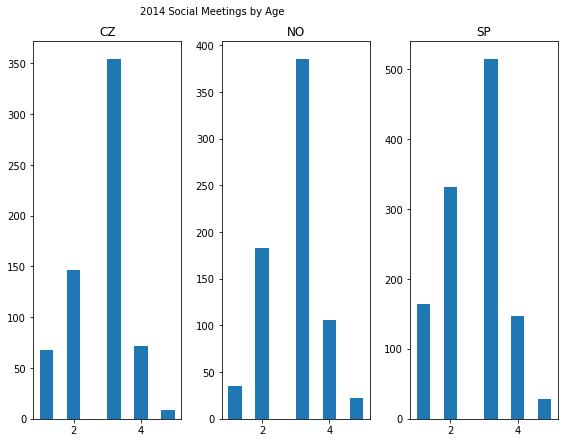

In [94]:
czech = df['sclact'][(df['cntry'] == 'CZ') & (df['year'] == 7)].dropna()
norway = df['sclact'][(df['cntry'] == 'NO') & (df['year'] == 7)].dropna()
spain = df['sclact'][(df['cntry'] == 'ES')& (df['year'] == 7)].dropna()


fig, axs = plt.subplots(1, 3, figsize=(8, 6))

axs[0].hist(czech)
axs[1].hist(norway)
axs[2].hist(spain)

fig.text(0.25, 1, '2014 Social Meetings by Age')
axs[0].set_title('CZ')
axs[1].set_title('NO')
axs[2].set_title('SP')
    
plt.tight_layout()
plt.show()

In [95]:
F, p = stats.f_oneway(czech, norway, spain)

print('F score: ' + str(F))
print('P-value: ' + str(p))

F score: 16.607418390848494
P-value: 6.82063334451585e-08


A low p value indicates a difference in the means.

In [96]:
print('Czech Republic mean: ' + str(czech.mean()))
print('Czech Republic count: ' + str(czech.count()))
print('Norway mean: ' + str(norway.mean()))
print('Norway count: ' + str(norway.count()))
print('Spain mean: ' + str(spain.mean()))
print('Spain count: ' + str(spain.count()))

Czech Republic mean: 2.703076923076923
Czech Republic count: 650
Norway mean: 2.859097127222982
Norway count: 731
Spain mean: 2.6168776371308016
Spain count: 1185


In [97]:
print('Norway and Czech Republic: ' + str(stats.ttest_ind(norway, czech)))
print('Spain and Norway: ' + str(stats.ttest_ind(spain, norway)))
print('Czech Republic and Spain: ' + str(stats.ttest_ind(czech, spain)))

Norway and Czech Republic: Ttest_indResult(statistic=3.44673561169421, pvalue=0.0005844634540645623)
Spain and Norway: Ttest_indResult(statistic=-5.671149129663532, pvalue=1.6345881270312057e-08)
Czech Republic and Spain: Ttest_indResult(statistic=1.9231457887987455, pvalue=0.05461649785517343)


In [ ]:
There is not a large difference in the means, but the pairwise t-tests